##  Global vs. Local Alignment Using Python
 Sequence alignment is a fundamental concept in bioinformatics for identifying regions of similarity between DNA, RNA, or protein sequences. There are two main types of sequence alignment: global alignment and local alignment.

- Global alignment: Aligns sequences end-to-end, aiming to align as many characters as possible from start to finish.
- Local alignment: Finds the best matching subsequences within the larger sequences, allowing for gaps at the ends.
In this tutorial, we will use the Biopython library to perform both global and local sequence alignments.



In [1]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment


/home/aarun/Documents/projects/bioinformatics/.venv/lib/python3.12/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
seq1 = "GATTACA"
seq2 = "GCATGCU"

# Global alignment aligns sequences from end to end.

# Perform global alignment
global_alignments = pairwise2.align.globalxx(seq1, seq2)

# Display the alignments
print("Global Alignments:")
for alignment in global_alignments:
    print(format_alignment(*alignment))


# Local alignment finds the best matching subsequences.
# Perform local alignment
local_alignments = pairwise2.align.localxx(seq1, seq2)

# Display the alignments
print("\nLocal Alignments:")
for alignment in local_alignments:
    print(format_alignment(*alignment))


Global Alignments:
G-ATTA-CA-
| | |  |  
GCA-T-GC-U
  Score=4

G-ATTA-CA-
| ||   |  
GCAT--GC-U
  Score=4

G-ATTACA-
| | |.|  
GCA-TGC-U
  Score=4

G-ATTACA-
| || .|  
GCAT-GC-U
  Score=4

G-ATTACA-
| ||. |  
GCATG-C-U
  Score=4

G-ATTA-CA
| | |  |.
GCA-T-GCU
  Score=4

G-ATTA-CA
| ||   |.
GCAT--GCU
  Score=4

G-ATTACA
| | |.|.
GCA-TGCU
  Score=4

G-ATTACA
| || .|.
GCAT-GCU
  Score=4

G-ATTACA
| ||. |.
GCATG-CU
  Score=4


Local Alignments:
1 G-ATTA-C
  | | |  |
1 GCA-T-GC
  Score=4

1 G-ATTA-C
  | ||   |
1 GCAT--GC
  Score=4

1 G-ATTAC
  | | |.|
1 GCA-TGC
  Score=4

1 G-ATTAC
  | || .|
1 GCAT-GC
  Score=4

1 G-ATTAC
  | ||. |
1 GCATG-C
  Score=4



- Global Alignment Use Case: Comparing entire genomes or long sequences where end-to-end alignment is necessary.
- Local Alignment Use Case: Identifying conserved regions or motifs within proteins or genes.

### Gene Finding
- Objective: Identify gene locations within DNA sequences. This involves searching for open reading frames (ORFs) and other gene structures.

- Example: Finding ORFs
- Biopython provides tools to identify ORFs

In [4]:
from Bio.Seq import Seq
 
dna_seq = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")

# A simple method to find ORFs is to look for start (ATG) and stop codons (TAA, TAG, TGA).

def find_orfs(dna_seq):
    start_codon = "ATG"
    stop_codons = ["TAA", "TAG", "TGA"]
    orfs = []
    
    for i in range(len(dna_seq)):
        if dna_seq[i:i+3] == start_codon:
            for j in range(i, len(dna_seq), 3):
                codon = dna_seq[j:j+3]
                if codon in stop_codons:
                    orfs.append(dna_seq[i:j+3])
                    break
    return orfs

orfs = find_orfs(dna_seq)
for orf in orfs:
    print(f"ORF found: {orf}")


ORF found: ATGGCCATTGTAATGGGCCGCTGA
ORF found: ATGGGCCGCTGA


### Evolutionary Studies
- Objective: Understand evolutionary relationships by comparing genetic sequences across different species.

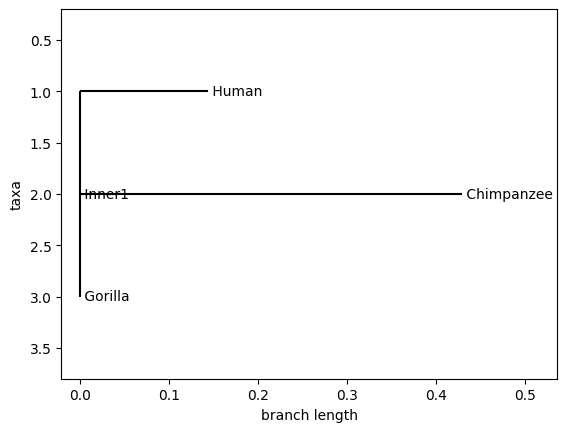

In [5]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, DistanceCalculator
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord


seq1 = SeqRecord(Seq("GATTACA"), id="Human")
seq2 = SeqRecord(Seq("GCATGCU"), id="Chimpanzee")
seq3 = SeqRecord(Seq("GATTGCA"), id="Gorilla")

alignment = MultipleSeqAlignment([seq1, seq2, seq3])


calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

# Draw the tree
Phylo.draw(tree)

